In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'src')))
from EDA_analysis import (drop_high_null_columns,impute_missing_values,plot_box_and_dist,plot_claim_frequency_by_count)   


In [3]:
data = pd.read_csv("../Data/MachineLearningRating_v3.txt", sep="|", parse_dates=["TransactionMonth"])

C:\Users\adoni\AppData\Local\Temp\ipykernel_10328\2191672195.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../Data/MachineLearningRating_v3.txt", sep="|", parse_dates=["TransactionMonth"])


### Basic EDA

In [4]:
# Display the first few rows of the dataset
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
# desplay the last few rows of the dataset
data.tail()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000097,31519,389,2015-02-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [6]:
# data types of each column in the dataset
print(f"The data types of columns are:\n{data.dtypes}")
# number of rows and columns in the dataset
print(f"The number of rows and columns in the dataset are: {data.shape}")

The data types of columns are:
UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                  

In [7]:
 # total number of all unique values per column in the dataset
print(f"The total number of all unique values per column in the dataset are(top 25):"
      f"\n{data[data.columns[:25]].nunique()}") #for readability

The total number of all unique values per column in the dataset are(top 25):
UnderwrittenCoverID    116532
PolicyID                 7000
TransactionMonth           23
IsVATRegistered             2
Citizenship                 4
LegalType                   6
Title                       5
Language                    1
Bank                       11
AccountType                 3
MaritalStatus               3
Gender                      3
Country                     1
Province                    9
PostalCode                888
MainCrestaZone             16
SubCrestaZone              45
ItemType                    1
mmcode                    427
VehicleType                 5
RegistrationYear           25
make                       46
Model                     411
Cylinders                   7
cubiccapacity             122
dtype: int64


In [8]:
#the rest of the columns
print(f"The total number of all unique values per column in the dataset are(bottom 27):\n{data[data.columns[25:]].nunique()}")

The total number of all unique values per column in the dataset are(bottom 27):
kilowatts                      82
bodytype                       13
NumberOfDoors                   6
VehicleIntroDate              174
CustomValueEstimate           923
AlarmImmobiliser                2
TrackingDevice                  2
CapitalOutstanding           1011
NewVehicle                      2
WrittenOff                      2
Rebuilt                         2
Converted                       2
CrossBorder                     1
NumberOfVehiclesInFleet         0
SumInsured                   2186
TermFrequency                   2
CalculatedPremiumPerTerm    19869
ExcessSelected                 13
CoverCategory                  28
CoverType                      22
CoverGroup                     14
Section                         5
Product                         4
StatutoryClass                  1
StatutoryRiskType               1
TotalPremium                38959
TotalClaims                  1615
dt

In [9]:
# Display the summary statistics of the dataset
print(f"There are {data.describe().columns.size} numeric/datetime columns in the dataset.")
print("Summary statistics of the numeric/datetime columns in the dataset:")
data.describe()

There are 16 numeric/datetime columns in the dataset.
Summary statistics of the numeric/datetime columns in the dataset:


,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1000098,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,2015-02-28 10:49:29.147423744,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
min,1.000000e+00,1.400000e+01,2013-10-01 00:00:00,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,2015-01-01 00:00:00,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2015-04-01 00:00:00,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,2015-06-01 00:00:00,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,2015-08-01 00:00:00,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05
std,6.329371e+04,5.290039e+03,NaN,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03


In [10]:
# Display the information about the dataset(datatypes, non-null counts)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

In [11]:
# Check for missing values in the dataset
print("Checking for missing values in the dataset:(top 25 columns)")
print(data[data.columns[:25]].isna().sum())
 

Checking for missing values in the dataset:(top 25 columns)
UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                   145961
AccountType             40232
MaritalStatus            8259
Gender                   9536
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                    552
VehicleType               552
RegistrationYear            0
make                      552
Model                     552
Cylinders                 552
cubiccapacity             552
dtype: int64


In [12]:
# the rest of the columns
print("Checking for missing values in the dataset:(bottom 27 columns)")
print(data[data.columns[25:]].isna().sum())

Checking for missing values in the dataset:(bottom 27 columns)
kilowatts                       552
bodytype                        552
NumberOfDoors                   552
VehicleIntroDate                552
CustomValueEstimate          779642
AlarmImmobiliser                  0
TrackingDevice                    0
CapitalOutstanding                2
NewVehicle                   153295
WrittenOff                   641901
Rebuilt                      641901
Converted                    641901
CrossBorder                  999400
NumberOfVehiclesInFleet     1000098
SumInsured                        0
TermFrequency                     0
CalculatedPremiumPerTerm          0
ExcessSelected                    0
CoverCategory                     0
CoverType                         0
CoverGroup                        0
Section                           0
Product                           0
StatutoryClass                    0
StatutoryRiskType                 0
TotalPremium                      0
T

### Handling Missing Values

During the exploratory data analysis, it was observed that some columns contain a very high number of null (missing) values. These columns are considered less significant for the analysis and will be dropped from the dataset to improve data quality and model performance. 

For columns with a moderate number of missing values, appropriate imputation techniques will be applied to fill in the missing data, ensuring that valuable information is retained for further analysis.

In [13]:
data = drop_high_null_columns(data, threshold=0.5)
data.shape # display the shape of the dataset after dropping high null columns

Columns with more than 50% null values: ['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']


(1000098, 46)

In [14]:
data = impute_missing_values(data) # impute missing values in the dataset for columns with small amout of nulls
print(f"Total missing values in the dataset after imputing: {data.isna().sum().sum()}") # check for missing values in the dataset after imputing

Imputing numeric columns with mean: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
Imputing non-numeric columns with 'Unknown': ['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']
Total missing values in the dataset after imputing: 0


In [15]:
# check for duplicate rows in the dataset
print(f"There are {data.duplicated().sum()} duplicate rows in the dataset.")

There are 74 duplicate rows in the dataset.


In [16]:
data = data.drop_duplicates() # drop duplicate rows in the dataset
print(f"The shape of the dataset after dropping duplicate rows is: {data.shape}")
# Display the first few rows of the dataset after cleaning  
data.head()

The shape of the dataset after dropping duplicate rows is: (1000024, 46)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [17]:
# save the cleaned dataset to a new CSV file
data.to_csv("../Data/MachineLearningRating_v3_cleaned.csv", index=False)

In [18]:
# Load the cleaned dataset
cleaned_data = pd.read_csv("../Data/MachineLearningRating_v3_cleaned.csv", parse_dates=["TransactionMonth"])
# Display the first few rows of the cleaned dataset and shape
print(f"The shape of the cleaned dataset is: {cleaned_data.shape}")
print("First few rows of the cleaned dataset:")
cleaned_data.head()

C:\Users\adoni\AppData\Local\Temp\ipykernel_10328\1061288992.py:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv("../Data/MachineLearningRating_v3_cleaned.csv", parse_dates=["TransactionMonth"])


The shape of the cleaned dataset is: (1000024, 46)
First few rows of the cleaned dataset:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Analysis Overview

In the following sections, we will explore key aspects of the insurance portfolio to guide further risk assessment and modeling. Specifically, we will:

1. **Calculate the overall Loss Ratio** and analyze how it varies across **Province**, **Vehicle Type**, and **Gender**.
2. **Explore distributions of key financial variables**, focusing on identifying any **outliers** that may affect results.
3. **Analyze temporal trends** in claim frequency and severity over the 18-month period.
4. **Investigate vehicle makes/models** to determine those associated with the **highest and lowest claim amounts**.

This analysis will help us uncover patterns in claims behavior, potential risk factors, and areas requiring deeper investigation.

In [19]:
# Create a LossRatio column for each row
cleaned_data["LossRatio"] = cleaned_data["TotalClaims"] / cleaned_data["TotalPremium"]
#look at the first few rows of the dataset with the new LossRatio column
print("First few rows of the dataset with the new LossRatio column:")
cleaned_data["LossRatio"]

First few rows of the dataset with the new LossRatio column:


0          0.0
1          0.0
2          NaN
3          0.0
4          NaN
          ... 
1000019    0.0
1000020    0.0
1000021    0.0
1000022    0.0
1000023    0.0
Name: LossRatio, Length: 1000024, dtype: float64

In [20]:
# Check for any null values in the LossRatio column
cleaned_data["LossRatio"].isnull().sum()  # Check for any null values in the LossRatio column

np.int64(381412)

In [21]:
# Check for rows where both TotalPremium and TotalClaims are zero
print("Checking for rows where both TotalPremium and TotalClaims are zero:")
cleaned_data.query("TotalPremium == 0 and TotalClaims == 0").count()

Checking for rows where both TotalPremium and TotalClaims are zero:


UnderwrittenCoverID         381412
PolicyID                    381412
TransactionMonth            381412
IsVATRegistered             381412
Citizenship                 381412
LegalType                   381412
Title                       381412
Language                    381412
Bank                        381412
AccountType                 381412
MaritalStatus               381412
Gender                      381412
Country                     381412
Province                    381412
PostalCode                  381412
MainCrestaZone              381412
SubCrestaZone               381412
ItemType                    381412
mmcode                      381412
VehicleType                 381412
RegistrationYear            381412
make                        381412
Model                       381412
Cylinders                   381412
cubiccapacity               381412
kilowatts                   381412
bodytype                    381412
NumberOfDoors               381412
VehicleIntroDate    

## Removing “Zero‑Exposure” Records

Some rows have **TotalPremium = 0** and **TotalClaims = 0**, which makes their **LossRatio = NaN** (0÷0 is undefined). We drop these because they:

1. Don’t represent real policies or risk exposure.  
2. Leave blank LossRatio values that would skew our overall metrics.  
3. Aren’t useful for targeting actual customers.

In [22]:
# drom rows where both TotalPremium and TotalClaims are zero (these rows will have LossRatio as NaN)
cleaned_data.dropna(inplace=True, subset=["LossRatio"])

In [23]:
#confirm that there are no more null values in the LossRatio column
print(f"Total number of null values: {cleaned_data.isna().sum().sum()}")

Total number of null values: 0


when calculating group level loss ration we will be using the pandas aggreagate function as shown below:

loss_ratio = Total_claims.sum()/Total_premiums.sum()

* this is done not to mask the effect of large permiums within a group 

In [24]:
#by province 
province_data = cleaned_data.groupby("Province", as_index=False).agg({
  'TotalClaims': 'sum',
  'TotalPremium': 'sum'
})

#Calculate loss Ration
province_data["LossRatio"] = province_data["TotalClaims"]/province_data["TotalPremium"]
province_data



,Province,TotalClaims,TotalPremium,LossRatio
0,Eastern Cape,1.356427e+06,2.140104e+06,0.633813
1,Free State,3.549223e+05,5.213632e+05,0.680758
2,Gauteng,2.939415e+07,2.405373e+07,1.222020
3,KwaZulu-Natal,1.430138e+07,1.320908e+07,1.082693
4,Limpopo,1.016477e+06,1.537324e+06,0.661199
5,Mpumalanga,2.044675e+06,2.836292e+06,0.720897
6,North West,5.920250e+06,7.490508e+06,0.790367
7,Northern Cape,8.949051e+04,3.165581e+05,0.282699
8,Western Cape,1.038977e+07,9.806559e+06,1.059472


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Eastern Cape'),
  Text(1, 0, 'Free State'),
  Text(2, 0, 'Gauteng'),
  Text(3, 0, 'KwaZulu-Natal'),
  Text(4, 0, 'Limpopo'),
  Text(5, 0, 'Mpumalanga'),
  Text(6, 0, 'North West'),
  Text(7, 0, 'Northern Cape'),
  Text(8, 0, 'Western Cape')])

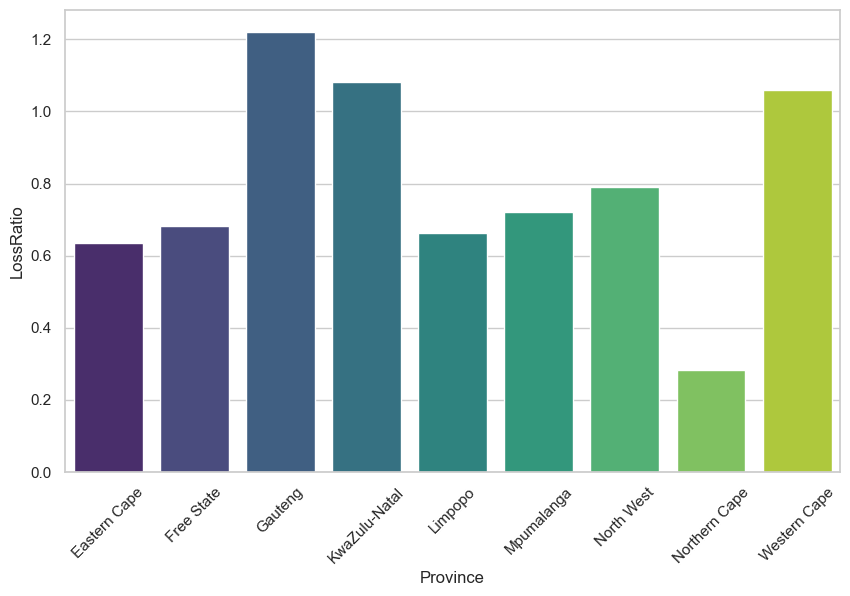

In [25]:
#barchart of Loss Ratio by Province
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(
    x='Province', 
    y='LossRatio', 
    data=province_data,
    hue ='Province',
    palette='viridis'      
)
plt.xticks(rotation=45)

## Loss Ratio Insights by Province

- **Moderate Risk (60–80% Loss Ratio):**
  - **Eastern Cape, Free State, Limpopo, Mpumalanga, North West**  
    These provinces exhibit loss ratios between **0.6 and 0.8**, meaning the company pays out **60–80%** of premium revenues in claims. They represent moderate‐risk regions and warrant close monitoring.

- **High Risk (Loss Ratio > 1):**
  - **Gauteng, KwaZulu‑Natal, Western Cape**  
    Here, the loss ratios exceed **1.0**, indicating claims exceed premiums collected. This suggests underwriting losses and signals an urgent need to **reassess premium rates** or **tighten risk selection** in these provinces.

- **Low Risk (20-30% Loss Ratio):**
  - **Northern Cape**  
    With a loss ratio around **0.2-0.3**, only **20-30%** of premiums are paid out, leaving an **80% margin**. This low‐risk area could be targeted with **competitive premium reductions** to improve customer retention and attract new business.


In [26]:
#by VehicleType 
VehicleType_data = cleaned_data.groupby("VehicleType", as_index=False).agg({
  'TotalClaims': 'sum',
  'TotalPremium': 'sum'
})

#Calculate loss Ration
VehicleType_data["LossRatio"] = province_data["TotalClaims"]/province_data["TotalPremium"]
VehicleType_data

,VehicleType,TotalClaims,TotalPremium,LossRatio
0,Bus,7.996535e+03,5.824474e+04,0.633813
1,Heavy Commercial,7.504746e+05,4.609479e+05,0.680758
2,Light Commercial,6.045250e+04,2.604975e+05,1.222020
3,Medium Commercial,4.119867e+06,3.922746e+06,1.082693
4,Passenger Vehicle,5.937207e+07,5.664197e+07,0.661199
5,Unknown,5.566860e+05,5.671104e+05,0.720897


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Bus'),
  Text(1, 0, 'Heavy Commercial'),
  Text(2, 0, 'Light Commercial'),
  Text(3, 0, 'Medium Commercial'),
  Text(4, 0, 'Passenger Vehicle'),
  Text(5, 0, 'Unknown')])

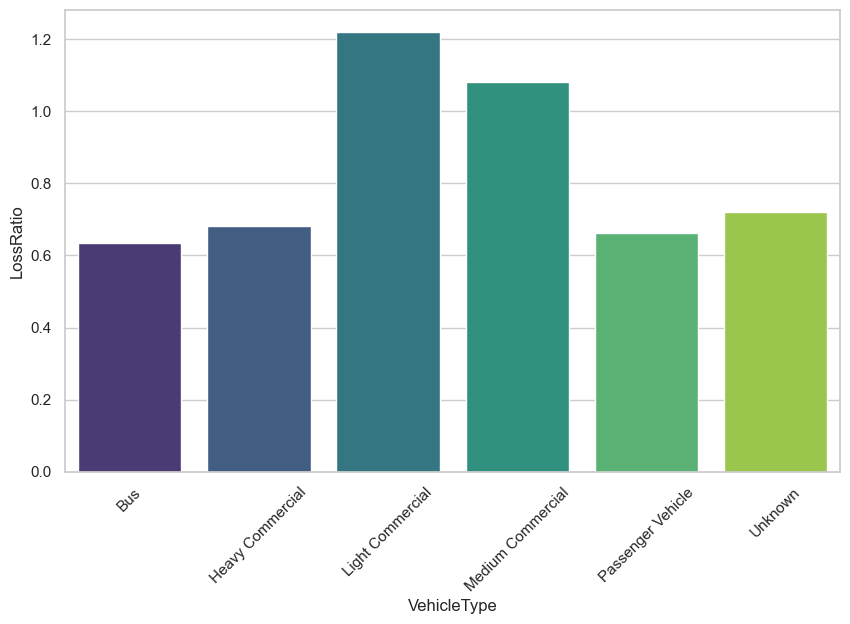

In [27]:
#barchart of Loss Ratio by VehicleType
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(
    x='VehicleType', 
    y='LossRatio', 
    data=VehicleType_data,
    hue ='VehicleType',
    palette='viridis'      
)
plt.xticks(rotation=45)

###  Loss Ratio Insights by Vehicle Type

#### Observations:
- **Bus**, **Heavy Commercial**, **Passenger Vehicle**, and **Unknown** (vehicle type not specified in the underwritten policy) exhibit **loss ratios between 0.6 and 0.8**.
- In contrast, **Light Commercial** and **Medium Commercial** vehicle types exhibit **loss ratios greater than 1.0**, with **Light Commercial** exceeding **1.2**.

#### ✅ Conclusion:
- A **thorough reassessment** of the **claim rates** and **premium values** for **Light Commercial** and **Medium Commercial** vehicles is recommended, as they currently operate at a **loss**.
- **Adjustments** may also be required for the other vehicle types, although their loss ratios are **moderate**.
- The **"Unknown"** category likely corresponds to one of the moderate-risk vehicle types, given its similar loss ratio range


In [28]:
#by Gender 
Gender_data = cleaned_data.groupby("Gender", as_index=False).agg({
  'TotalClaims': 'sum',
  'TotalPremium': 'sum'
})

#Calculate loss Ration
Gender_data["LossRatio"] = province_data["TotalClaims"]/province_data["TotalPremium"]
Gender_data

,Gender,TotalClaims,TotalPremium,LossRatio
0,Female,2.502461e+05,3.044806e+05,0.633813
1,Male,1.396704e+06,1.580143e+06,0.680758
2,Not specified,6.271410e+07,5.920271e+07,1.222020
3,Unknown,5.064931e+05,8.241871e+05,1.082693


([0, 1, 2, 3],
 [Text(0, 0, 'Female'),
  Text(1, 0, 'Male'),
  Text(2, 0, 'Not specified'),
  Text(3, 0, 'Unknown')])

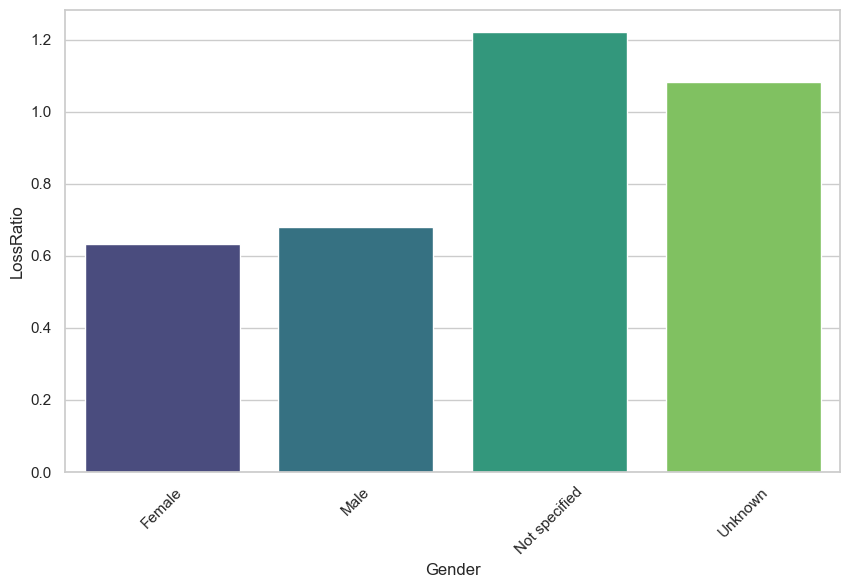

In [29]:
#barchart of Loss Ratio by Gender
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(
    x='Gender', 
    y='LossRatio', 
    data=Gender_data,
    hue ='Gender',
    palette='viridis'     
)
plt.xticks(rotation=45)

### Loss Ratio Insights by Gender

#### Observations:
- Both **Male** and **Female** policyholders exhibit **loss ratios in the range of 0.6 to 0.7**, indicating relatively **healthy profit margins**.
- However, two other categories present higher loss ratios:
  - **Not_Specified** exceeds a **loss ratio of 1.2**.
  - **Unknown** (imputed from missing `NaN` values) exhibits a **loss ratio greater than 1.0**.

#### ✅ Conclusion:
- The **high loss ratios** in the **Not_Specified** and **Unknown** categories indicate potential **data quality issues** or **atypical risk profiles** associated with incomplete records.
- It's recommended to:
  - **Investigate** these entries to determine whether they correspond to specific client segments.
  - Consider **mandatory gender data collection** in future policies to reduce uncertainty and enable **accurate risk assessment**.
- Overall, the **gender variable** appears **predictive of profitability**, but **data completeness** is critical for making sound underwriting decisions.


## Below we will Explore the distribution of **key financial variables**

### 🔔 Note on Visualizations
Due to the right skewed nature of the financial variables (few very large values), a log transformation was applied to improve the readability of the plots.


C:\Users\adoni\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


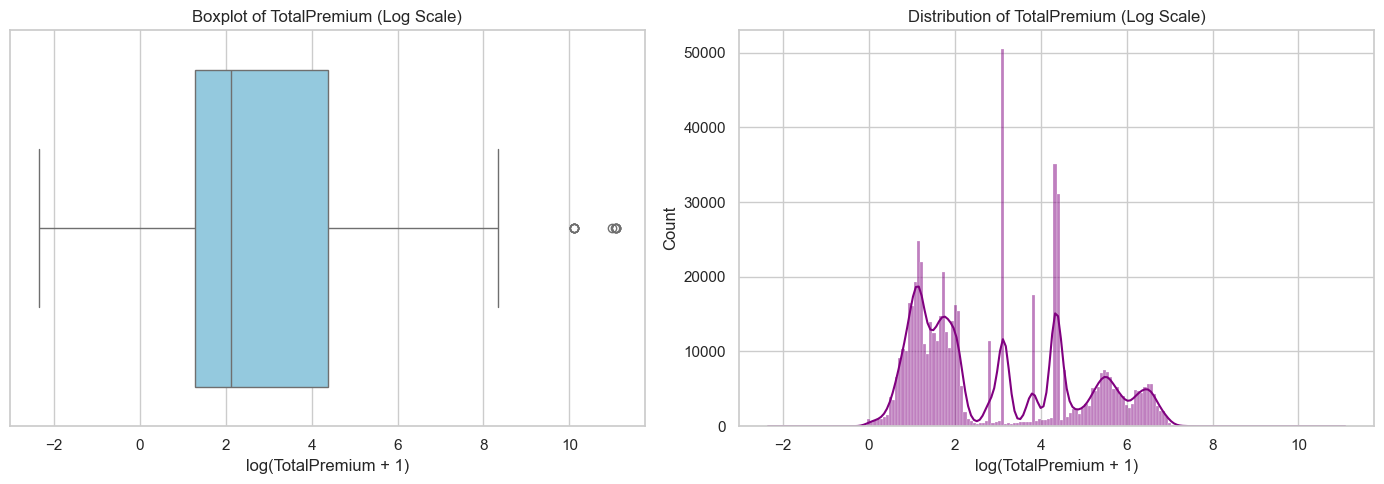

C:\Users\adoni\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


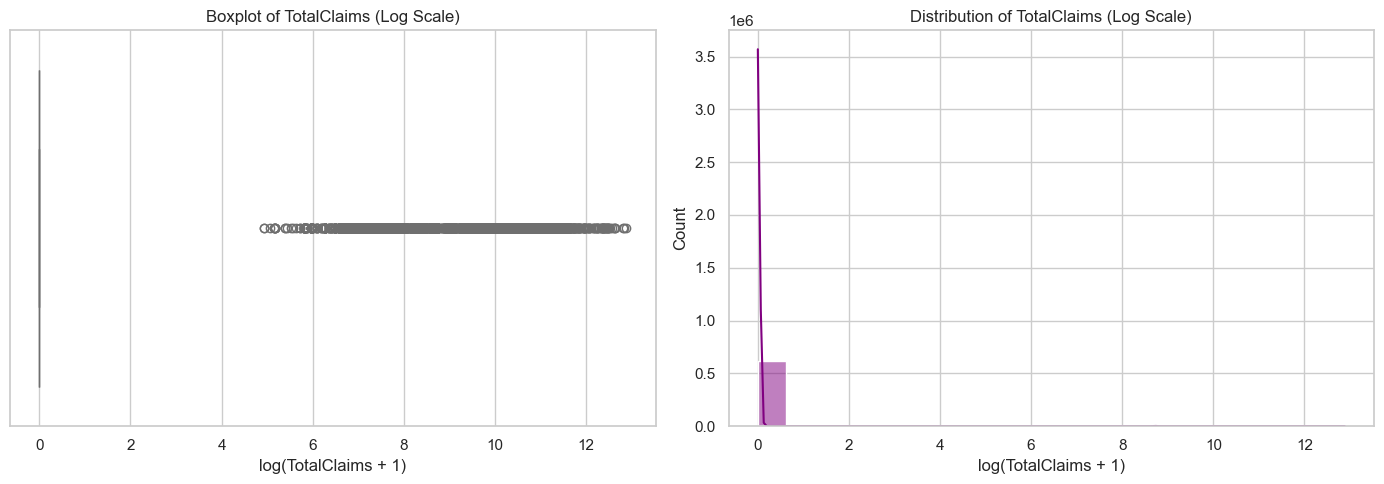

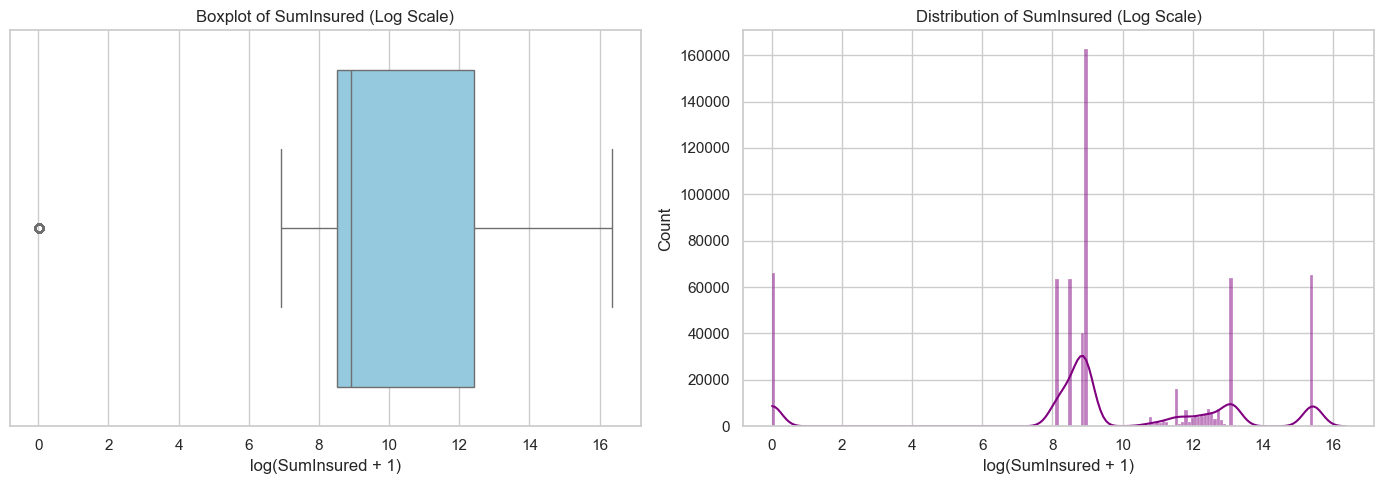

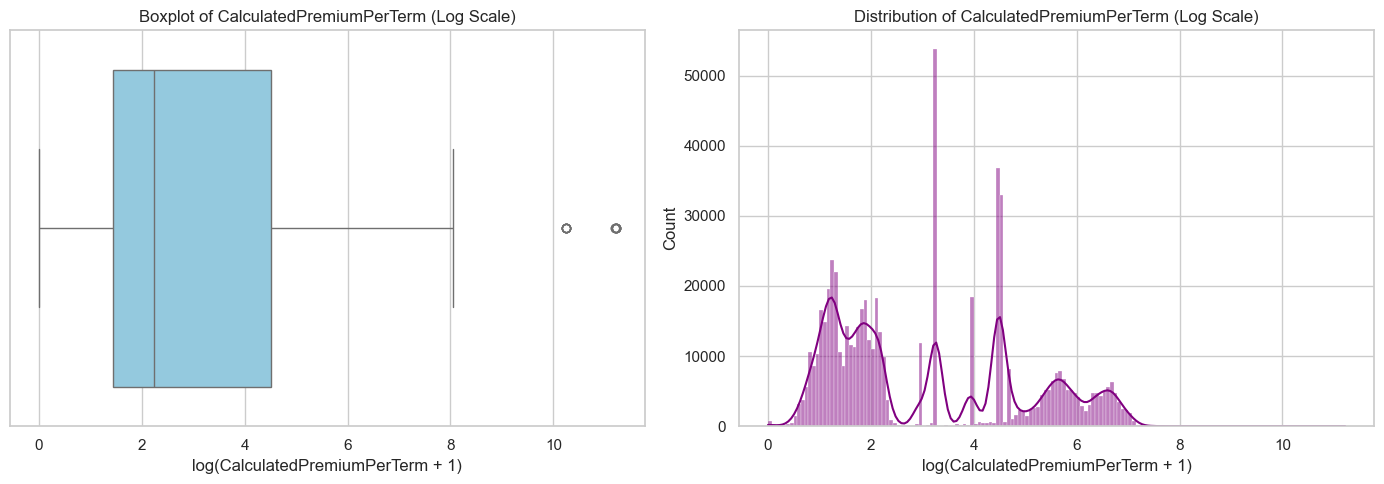

In [30]:
# key financial variables to analyze
key_vars = [
    'TotalPremium',
    'TotalClaims',
    'SumInsured',
    'CalculatedPremiumPerTerm'
]

# Plot boxplots and distribution plots for key financial variables
for var in key_vars:
    plot_box_and_dist(cleaned_data, var)

In [31]:
# Display summary statistics for key financial variables since the boxplots and distribution plots are highly skewed and are not very readable
cleaned_data[key_vars].describe()  # Display summary statistics for key financial variables

,TotalPremium,TotalClaims,SumInsured,CalculatedPremiumPerTerm
count,618612.000000,618612.000000,6.186120e+05,618612.000000
mean,100.081342,104.859825,6.096588e+05,118.601101
std,286.205305,3030.630309,1.514998e+06,344.690484
min,-782.576754,-12002.412281,1.000000e-02,0.000000
25%,2.627830,0.000000,5.000000e+03,3.258400
50%,7.270526,0.000000,7.500000e+03,8.436900
75%,78.947368,0.000000,2.505000e+05,90.000000
max,65282.603421,393092.105263,1.263620e+07,74422.167900


### 📌 Insights on Financial Variable Distributions

After visualizing the key financial variables with **boxplots** and **distribution plots**—adjusted using **logarithmic transformation** for better interpretability—we can draw the following **insights**:

#### 1️⃣ Highly Skewed Distributions
- From the summary statistics, **TotalPremium**, **TotalClaims**, **SumInsured**, and **CalculatedPremiumPerTerm** all show **extreme skewness**:
  - **Minimum values** are **close to zero** or even **negative**.
  - **Maximum values** are **extremely large**, leading to **long right tails** in the raw distributions.
  - **Example:**
    - `TotalPremium`: min ≈ **-782**, max ≈ **65,282**
    - `TotalClaims`: min ≈ **-12,002**, max ≈ **393,092**

#### 2️⃣ Log Transformation Adjustment
- To **reduce the skewness** and **enhance readability**, a **log transformation** was applied before visualization.
- The **distributions shown in the graphs** reflect this **log-adjusted view** of the data.
- Without this adjustment, **extreme outliers** would compress most of the data near zero, making the plots **uninformative**.
- In the adjustments process it is seen that there are some invalid values for a log transformation which is due to the persence of negative values specifically in the TotalPremiumn and some in the TotalClaims column which indicate refunds of overpayment, refunds due to policy canclation during policy life cycle and the like...
#### 3️⃣ Presence of Outliers
- Even **after log transformation**, we still observe **outliers**, indicated by distant points in the boxplots.
- This is consistent with the **high standard deviation** seen in the summary:
  - Example: `TotalClaims` → **mean ≈ 105**, **std ≈ 3,030** → suggesting **few extremely large claims** relative to typical amounts.
- It should also be highlighted that the TotalClaims column have only about 2700 non zero columns which explains its high skewness

#### 4️⃣ Implications
- These **outliers** and **extreme skewness** are **critical for risk analysis**:
  - A **small number of clients** may be responsible for **very high claim amounts**, significantly impacting profitability.
  - **Potential action:** Further analysis is needed to check if specific **client segments or vehicle types** contribute disproportionately to high claims.




# Temporal Destributoin of **Claims**

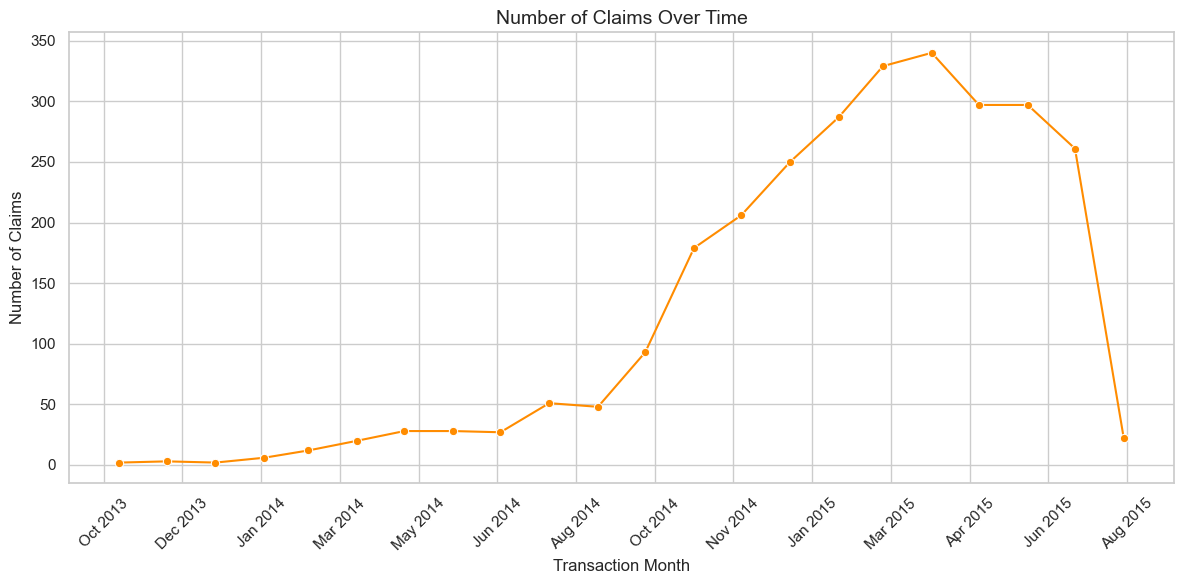

In [32]:
# plot the claim frequency by count for the cleaned dataset
plot_claim_frequency_by_count(cleaned_data, date_col='TransactionMonth', claims_col='TotalClaims')

# Insurance Claims Analysis  

## Observed Claim Patterns  
### July 2014 Extreme Spike  
- 300 claims recorded  
- 3× higher than baseline (100-150 claims)  
- Single highest volume in dataset  
### January 2015 Secondary Peak  
- 250 claims recorded  
- Exactly 6 months after July 2014 spike  
- Second highest volume  
### Sustained Decline  
- Continuous reduction from January 2015  
- 50 claims by July 2015  
## Required Investigations  
### July 2014 Event  
- Audit all claims from June-August 2014  
- Identify policy changes implemented in Q2 2014  
- Map geographic clusters of affected policies  
### January 2015 Event  
- Compare claim profiles with January 2014  
- Analyze policy renewal cycles ending December 2014  
- Review concentration of claim types  

### Data Quality Verification  
- Confirm data completeness through July 2015  
- Check for claim processing delays in 2015  
- Validate policy cancellation rates  

### Business Actions  
- Check for specific seasonal events 
- Implement seasonal premium adjustments  
- Create claim volume alert system (150+ claims/month)  


# Claims per Vhicle(Make and Model)

In [33]:
# Filter dataset to include only entries with actual claims
claims_df = cleaned_data[cleaned_data['TotalClaims'] > 0]

# Group by Make and Model, and count the number of claims
claim_counts = claims_df.groupby(['make', 'Model']).size().reset_index(name='NumberOfClaims')

# Sort by number of claims descending
claim_counts = claim_counts.sort_values(by='NumberOfClaims', ascending=False)

# Remove extra spaces in 'make' and 'Model' columns
claim_counts['make'] = claim_counts['make'].apply(lambda x: x.strip())
claim_counts['Model'] = claim_counts['Model'].apply(lambda x: x.strip())

# Display top results
print(claim_counts.shape)  # Display the shape of the claim_counts DataFrame
claim_counts.head(10)

(140, 3)


,make,Model,NumberOfClaims
110,TOYOTA,QUANTUM 2.7 SESFIKILE 15s,574
111,TOYOTA,QUANTUM 2.7 SESFIKILE 16s,500
109,TOYOTA,QUANTUM 2.7 SESFIKILE 14s,454
106,TOYOTA,QUANTUM 2.5 D-4D SESFIKILE 16s,266
102,TOYOTA,HiACE SUPER 16 F/Lift,173
104,TOYOTA,QUANTUM 2.5 D-4D 14 SEAT,84
101,TOYOTA,HiACE SIYAYA,84
85,TOYOTA,AVANZA 1.5 SX,39
59,MERCEDES-BENZ,SPRINTER 515 CDi HI-ROOF F/C P/V,37
20,CMC,AMANDLA 2.2,34


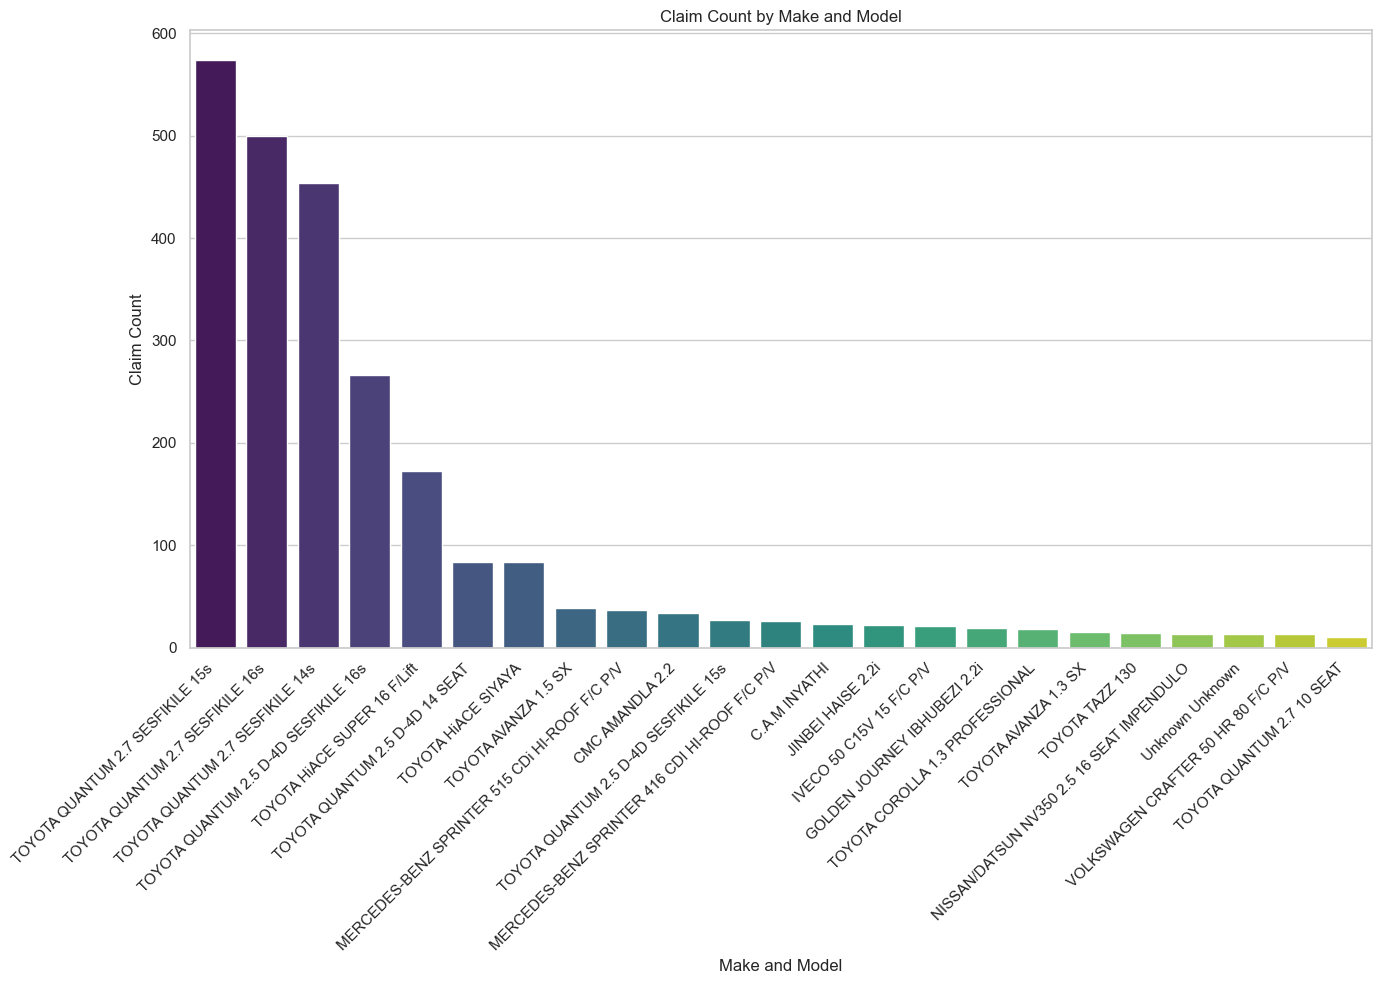

In [34]:
claim_counts['Make_Model'] = claim_counts['make'] + " " + claim_counts['Model']
sufficient_claims = claim_counts[(claim_counts['NumberOfClaims'] < 600)&(claim_counts['NumberOfClaims'] > 10)]

# Step 2: Plot the bar chart
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

sns.barplot(
    x='Make_Model',
    y='NumberOfClaims',
    data=sufficient_claims,
    hue = "Make_Model",
    palette='viridis'
)

plt.xticks(rotation=45, ha= "right")  # Rotate for readability
plt.xlabel("Make and Model")
plt.ylabel("Claim Count")
plt.title("Claim Count by Make and Model")
plt.tight_layout()
plt.show()

# 📊 Claim Count Analysis by Make and Model

## 📈 Key Observations

1. **Most Frequently Claimed Models:**
   - The top models with the highest claim counts are all Toyota Quantum variants:
     - `TOYOTA QUANTUM 2.7 SESFIKILE 15s` – ~570 claims
     - `TOYOTA QUANTUM 2.7 SESFIKILE 16s` – ~500 claims
     - `TOYOTA QUANTUM 2.7 SESFIKILE 14s` – ~460 claims
   - These models clearly dominate the claim distribution.

2. **Other High-Claim Models:**
   - Additional Toyota models also show high counts:
     - `TOYOTA QUANTUM 2.5 D-4D SESFIKILE 16s`
     - `TOYOTA HIACE SUPER 16 F/LIFT`
     - `TOYOTA QUANTUM 2.5 D-4D 14 SEAT`

3. **Moderate Claim Counts:**
   - Other models with moderate counts include:
     - `TOYOTA HIACE S/SYAKA`
     - `TOYOTA AVANZA 1.5 SX`
     - `MERCEDES BENZ SPRINTER 515 CDI HI-ROOF F/C P/V`
     - `CMC AMANDA 2.2`
     - `C.A.M INYATHI`
     - `JINBEI HAISE 2.2i`

4. **Lower Claim Models (but still above threshold):**
   - These include:
     - `TOYOTA COROLLA 1.3 PROFESSIONAL`
     - `TOYOTA AVANZA 1.3 SX`
     - `TOYOTA TAZZ 130`
     - `NISSAN DATSUN NV350 2.5 16 SEAT`
     - `VOLKSWAGEN CRAFTER 50 HR 80 F/C P/V`

---

## ✅ Business Recommendations

1. **Risk-Based Pricing Strategy:**
   - For high-claim models such as `TOYOTA QUANTUM` and `TOYOTA HIACE` variants, consider adjusting premium rates to reflect the higher historical risk.
   - Evaluate whether claim frequency justifies a higher base rate or usage-based pricing.

2. **Targeted Underwriting Policies:**
   - Introduce stricter underwriting rules for models with high claim rates.
     - For example, require additional documentation or inspection before issuing coverage.
   - For lower-claim models, streamline onboarding or offer discounts as incentives.

3. **Marketing and Product Differentiation:**
   - Highlight lower-claim models like the `TOYOTA COROLLA 1.3 PROFESSIONAL` or `TOYOTA TAZZ 130` in marketing campaigns as lower-risk, potentially more affordable insurance options.
   - Promote "Safe Driver + Safe Vehicle" bundles to attract cost-conscious customers.

4. **Product Design and Customization:**
   - Design insurance products specifically tailored to high-claim models.
     - Example: offer optional add-ons for theft protection or accident repairs for common claim types.
   - Bundle breakdown services or driver behavior analytics for higher-risk vehicles.

5. **Claims Investigation and Loss Prevention:**
   - Conduct deeper root-cause analysis for the most frequently claimed models.
     - Are claims related to parts failure, accident trends, or other recurring issues?
   - Share insights with OEM partners or offer policyholders vehicle care tips to reduce future claims.

6. **Portfolio Risk Monitoring:**
   - Use the model-level claim data to continuously monitor risk exposure in the insured portfolio.
   - Ensure that no single make/model cluster becomes disproportionately risky or overexposed.


## 📊 Summary of Key Insights and Recommendations

This analysis explored critical trends in the insurance dataset, focusing on claims behavior, customer risk profiles, and financial performance. Here's a summary of the main findings and actionable recommendations:

### 🔍 Key Insights:

- **Loss Ratio by Region:**
  - *High-risk provinces* like **Gauteng, KwaZulu-Natal, and Western Cape** had loss ratios > 1.0, signaling underwriting losses.
  - *Low-risk province* **Northern Cape** had a loss ratio around 0.2–0.3, suggesting a strong profit margin.

- **Vehicle Type Risk:**
  - **Light and Medium Commercial vehicles** had loss ratios well above 1.0, highlighting them as unprofitable segments.
  - **Passenger and Heavy Commercial vehicles** were more stable but still required monitoring.

- **Gender-Based Insights:**
  - **Male and Female** categories showed stable performance.
  - **Unknown/Not Specified** had elevated loss ratios (>1.0), hinting at data quality concerns or unmodeled risk.

- **Claims Over Time:**
  - A sharp increase in claims occurred from mid-2014 to early 2015, peaking around March 2015, followed by a steep drop.
  - This could indicate changes in policy rules, seasonal risk exposure, or fraud spikes.

- **Make & Model Claim Counts:**
  - Specific Toyota Quantum models (e.g., *2.7 Sesfikile 15s*, *16s*) had the **highest claim volumes**, implying high exposure or risk.
  - Less common models (e.g., *Nissan/Datsun NV350*, *Volkswagen Crafter*) had significantly fewer claims.

---

### 💡 Business Recommendations:

1. **Reassess Pricing Strategy:**
   - Review and potentially increase premiums for *Light/Medium Commercial vehicles* and *high-risk provinces*.
   - Offer competitive pricing or incentives in *low-risk areas* like Northern Cape to capture more market share.

2. **Improve Data Collection:**
   - Enforce mandatory capture of fields like **gender** and **vehicle type** to reduce "Unknown" categories that show higher risk.
   - Investigate and validate entries with missing or inconsistent values.

3. **Product & Portfolio Optimization:**
   - Consider targeted underwriting rules for frequently claimed models such as **Toyota Quantum Sesfikile 15s/16s**.
   - Tailor insurance packages for high-frequency vehicle models or adjust deductibles to manage risk exposure.

4. **Fraud & Spike Investigation:**
   - Analyze the claim spike from late 2014 to early 2015 in detail for potential fraud or systemic risk.

5. **Segment-Based Underwriting:**
   - Segment customers by vehicle make/model and province to better customize offerings and control portfolio risk.
